# Set Up :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('flights.csv')

In [3]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,5,16,6,UA,1511,N18220,PHX,ORD,1413,...,1929.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,4,7,2,AA,343,N3ALAA,LGA,ORD,1630,...,1908.0,48.0,0,0,NaN,14.0,0.0,0.0,34.0,0.0
2,2015,1,8,4,OO,2640,N988CA,ORD,ICT,835,...,1312.0,157.0,0,0,NaN,0.0,0.0,0.0,6.0,151.0
3,2015,5,5,2,OO,5219,N971SW,SBN,ORD,622,...,555.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,9,22,2,DL,134,N3736C,PHX,DTW,1003,...,1638.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5819 non-null   int64  
 1   MONTH                5819 non-null   int64  
 2   DAY                  5819 non-null   int64  
 3   DAY_OF_WEEK          5819 non-null   int64  
 4   AIRLINE              5819 non-null   object 
 5   FLIGHT_NUMBER        5819 non-null   int64  
 6   TAIL_NUMBER          5808 non-null   object 
 7   ORIGIN_AIRPORT       5819 non-null   object 
 8   DESTINATION_AIRPORT  5819 non-null   object 
 9   SCHEDULED_DEPARTURE  5819 non-null   int64  
 10  DEPARTURE_TIME       5740 non-null   float64
 11  DEPARTURE_DELAY      5740 non-null   float64
 12  TAXI_OUT             5739 non-null   float64
 13  WHEELS_OFF           5739 non-null   float64
 14  SCHEDULED_TIME       5819 non-null   int64  
 15  ELAPSED_TIME         5719 non-null   f

1/ this dataset has 5819 rows and 30 columns, it contains information about flights in and   out of the USA in a period of time we'll get to know later .

In [5]:
df.isna().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER              11
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME           79
DEPARTURE_DELAY          79
TAXI_OUT                 80
WHEELS_OFF               80
SCHEDULED_TIME            0
ELAPSED_TIME            100
AIR_TIME                100
DISTANCE                  0
WHEELS_ON                84
TAXI_IN                  84
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME             84
ARRIVAL_DELAY           100
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    5738
AIR_SYSTEM_DELAY       4727
SECURITY_DELAY         4727
AIRLINE_DELAY          4727
LATE_AIRCRAFT_DELAY    4727
WEATHER_DELAY          4727
dtype: int64

we have 11 airplane TAIL_NUMBER missing, and 79 flight departure_time and departure_delay ,this means that the plane never departed in other words the flight was canceled , we also have approxamatly the same number of NAs in (TAXI_OUT,WHEELS_OFF,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY) probably for the same reason but we'll know more when we analyze each variable on it's own , we have 4727 missing values in the delay reasons variables , this means that there was no delay on these flights , and 5738 missing values in the canncellation reason , this means that around 5738 flight weren't canceled 

# Uni variate analysis :

In [6]:
num_df = df.select_dtypes(exclude='object')
num_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819.0,5819.000000,5819.000000,5819.000000,5819.000000,5819.000000,5740.000000,5740.000000,5739.000000,5739.000000,...,5819.000000,5735.000000,5719.000000,5819.000000,5819.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,2015.0,6.548720,15.833820,3.892250,2184.850318,1331.887094,1337.180488,9.505923,16.032758,1360.225301,...,1492.495274,1466.753095,4.439762,0.003265,0.013920,12.453297,0.178571,18.836996,23.408425,2.818681
std,0.0,3.428716,8.799047,1.982887,1769.546216,487.974084,501.053221,37.514894,8.971177,501.914943,...,509.141721,533.068694,39.724046,0.057053,0.117169,25.294319,3.634061,48.821801,47.692952,15.600304
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-23.000000,3.000000,1.000000,...,1.000000,1.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,733.500000,915.000000,921.000000,-5.000000,11.000000,937.000000,...,1106.500000,1052.500000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1711.000000,1330.000000,1336.000000,-1.000000,14.000000,1351.000000,...,1523.000000,1510.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,10.000000,23.000000,6.000000,3214.000000,1730.500000,1740.000000,8.000000,19.000000,1754.000000,...,1915.000000,1910.000000,8.000000,0.000000,0.000000,17.000000,0.000000,19.000000,32.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.000000,2357.000000,1043.000000,134.000000,2400.000000,...,2359.000000,2400.000000,1054.000000,1.000000,1.000000,381.000000,88.000000,801.000000,1033.000000,247.000000


In [7]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 5819 non-null   int64  
 1   MONTH                5819 non-null   int64  
 2   DAY                  5819 non-null   int64  
 3   DAY_OF_WEEK          5819 non-null   int64  
 4   FLIGHT_NUMBER        5819 non-null   int64  
 5   SCHEDULED_DEPARTURE  5819 non-null   int64  
 6   DEPARTURE_TIME       5740 non-null   float64
 7   DEPARTURE_DELAY      5740 non-null   float64
 8   TAXI_OUT             5739 non-null   float64
 9   WHEELS_OFF           5739 non-null   float64
 10  SCHEDULED_TIME       5819 non-null   int64  
 11  ELAPSED_TIME         5719 non-null   float64
 12  AIR_TIME             5719 non-null   float64
 13  DISTANCE             5819 non-null   int64  
 14  WHEELS_ON            5735 non-null   float64
 15  TAXI_IN              5735 non-null   f

In [8]:
num_df['YEAR'].value_counts()
num_df['YEAR'].std()

0.0

this means that the variable year is insignificative in this data set it just iform us that these flights happend in the year of 2015 

In [9]:
num_df['DIVERTED'].value_counts()

DIVERTED
0    5800
1      19
Name: count, dtype: int64

In [10]:
num_df['CANCELLED'].value_counts()

CANCELLED
0    5738
1      81
Name: count, dtype: int64

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\1327968621.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['No', 'Yes'])
C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\1327968621.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['No', 'Yes'])


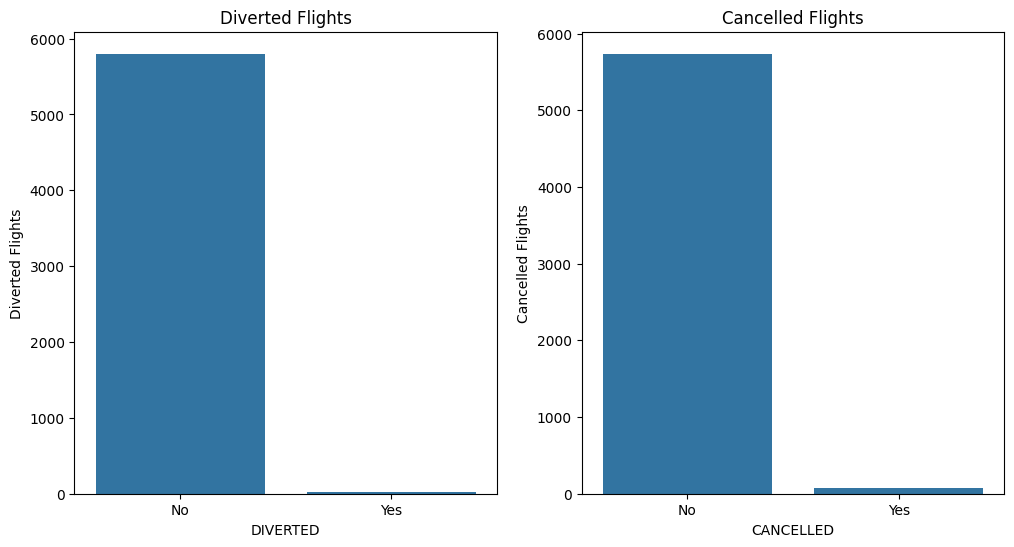

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='DIVERTED', ax=ax[0])
sns.countplot(data=df, x='CANCELLED', ax=ax[1])
ax[0].set_title('Diverted Flights')
ax[1].set_title('Cancelled Flights')
ax[0].set_xticklabels(['No', 'Yes'])
ax[1].set_xticklabels(['No', 'Yes'])
ax[0].set_ylabel('Diverted Flights')
ax[1].set_ylabel('Cancelled Flights')
plt.show()

this means that the diverted variable is considerd a categorical variable that explains whether the plane deviated to another airport (1) or not (0).
the same can be said about the cancelled variable .

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\240699681.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_df["MONTH"].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',


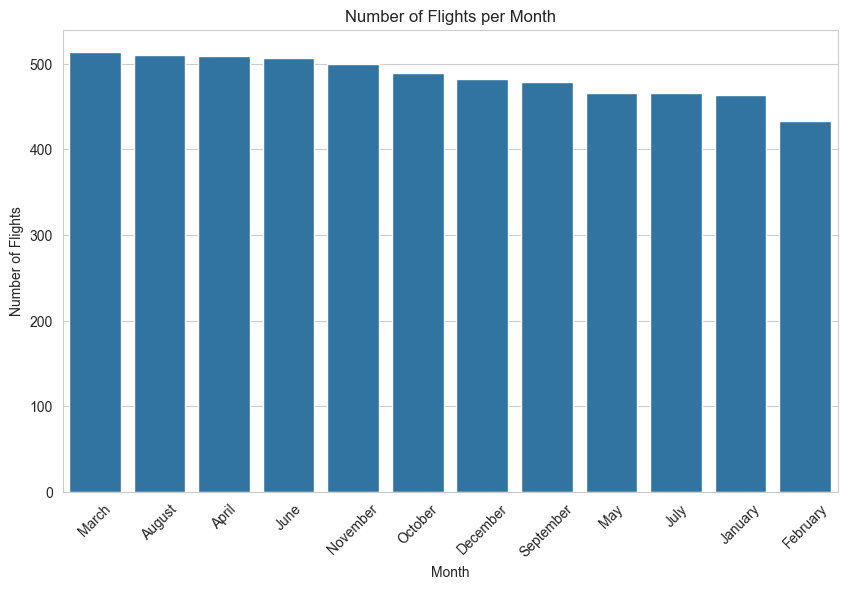

In [12]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
num_df["MONTH"].replace({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}, inplace=True)
sns.set_style('whitegrid')
sns.barplot(x=num_df['MONTH'].value_counts().index, y=num_df['MONTH'].value_counts().values)
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month')
plt.show()

In [13]:
num_df['MONTH'].value_counts().sort_values(ascending=False)

MONTH
March        514
August       510
April        509
June         507
November     500
October      489
December     482
September    479
May          466
July         466
January      464
February     433
Name: count, dtype: int64

this also means that the month variable is categorical and not numerical , representing months from Jan to Dec , and as we can see from this plot there's a similiar number of flights for each month , but the max number of flights was on march(514 FLIGHTS) and the minimum number of flights was on feburary( 433 FLIGHTS ).

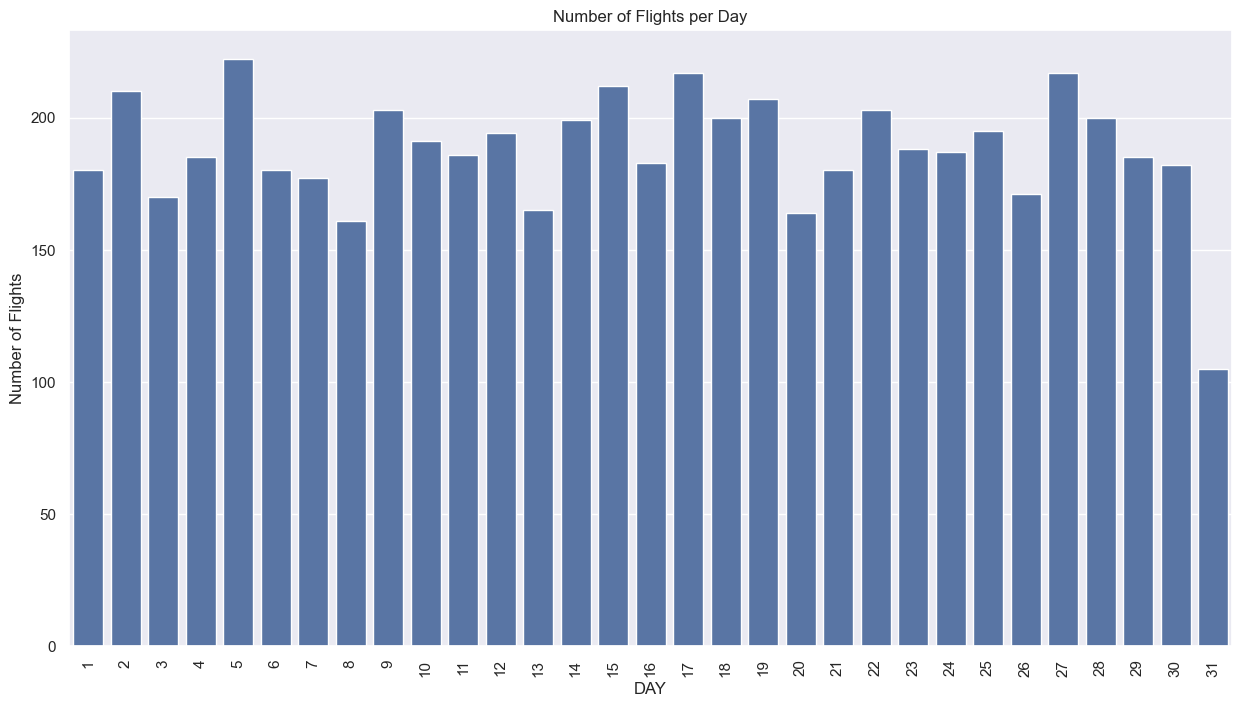

In [14]:
num_df['DAY'].value_counts().sort_values(ascending=False)
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x=num_df['DAY'].value_counts().index, y=num_df['DAY'].value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Day')
plt.show()

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\1906414030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_df['MONTH_TRIM'].value_counts().index, y=num_df['MONTH_TRIM'].value_counts().values, palette='viridis')


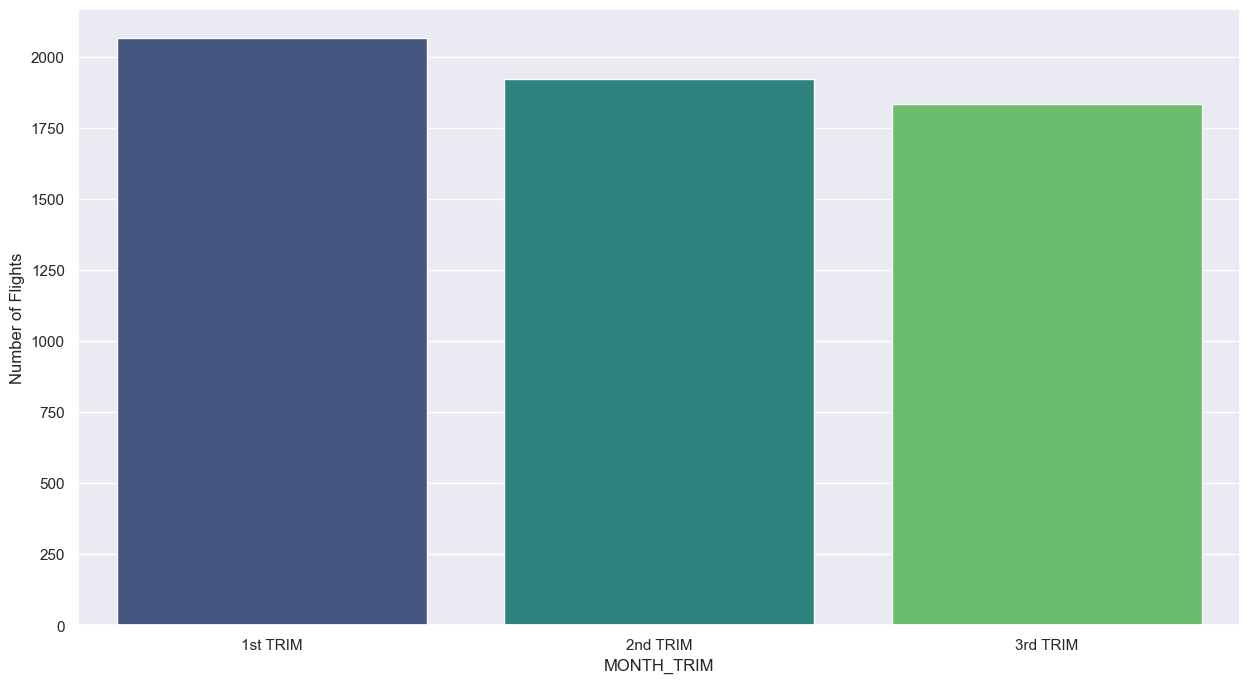

In [15]:
num_df['MONTH_TRIM']= pd.qcut(num_df['DAY'], q=3, labels=['1st TRIM', '2nd TRIM', '3rd TRIM'])
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x=num_df['MONTH_TRIM'].value_counts().index, y=num_df['MONTH_TRIM'].value_counts().values, palette='viridis')
plt.ylabel('Number of Flights')
plt.show()

again the DAY  variable can be considered as categorical variable , since it represent the days of the month from 1 to 31 , and as we notice the max number of flight is on day 5 with 222 flights and the minimum is on the last day of the month with 105 flights ,and we can say that most flights are done at the begining of the month 

In [16]:
num_df['DAY_OF_WEEK'].value_counts().sort_values(ascending=False)

DAY_OF_WEEK
2    893
4    881
3    868
1    859
5    830
7    798
6    690
Name: count, dtype: int64

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\3335153552.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_df['DAY_OF_WEEK'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}, inplace=True)


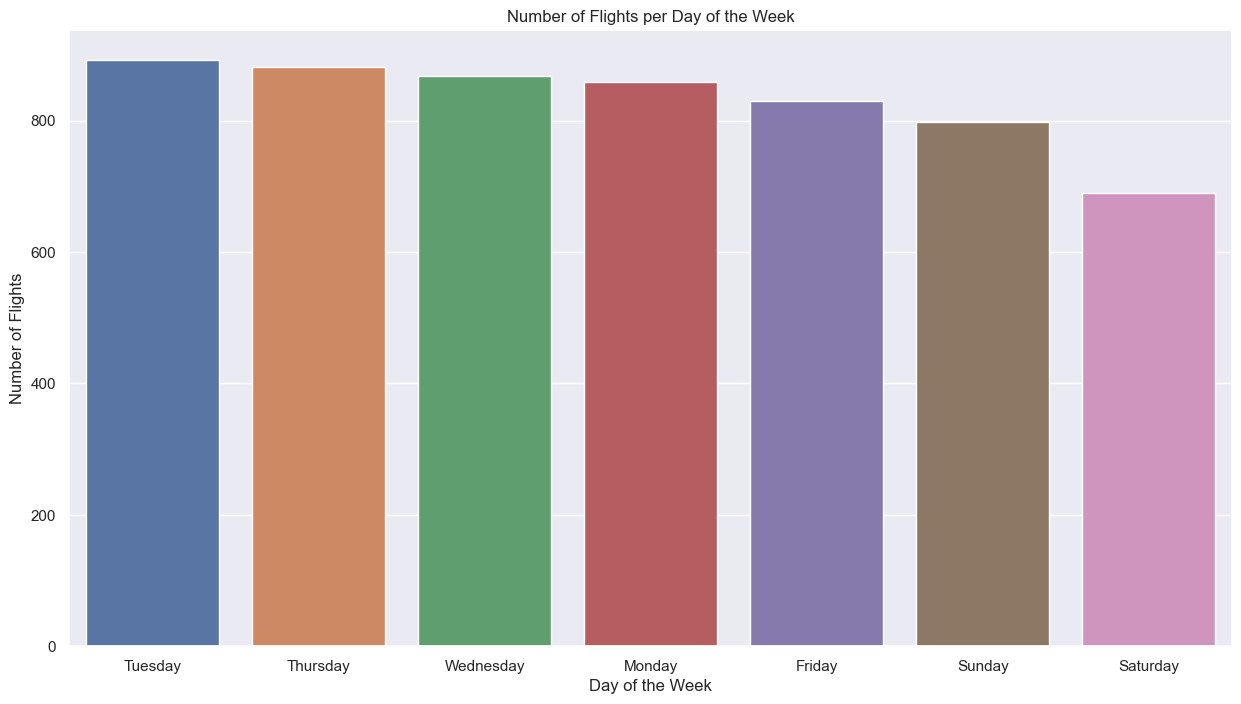

In [17]:
sns.set(rc={'figure.figsize':(15,8)})   
num_df['DAY_OF_WEEK'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}, inplace=True)
sns.barplot(x=num_df['DAY_OF_WEEK'].value_counts().index, y=num_df['DAY_OF_WEEK'].value_counts().values, hue=num_df['DAY_OF_WEEK'].value_counts().index)
plt.ylabel('Number of Flights')
plt.xlabel('Day of the Week')
plt.title('Number of Flights per Day of the Week')
plt.show()

In [18]:
num_df['FLIGHT_NUMBER']

0       1511
1        343
2       2640
3       5219
4        134
        ... 
5814    4339
5815    5071
5816    1422
5817    3682
5818     509
Name: FLIGHT_NUMBER, Length: 5819, dtype: int64

The Flight number column can be considered as an id for each flight , so is tail number for each air plane 

In [19]:
num_df.describe()

,YEAR,DAY,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819.0,5819.000000,5819.000000,5819.000000,5740.000000,5740.000000,5739.000000,5739.000000,5819.000000,5719.000000,...,5819.000000,5735.000000,5719.000000,5819.000000,5819.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,2015.0,15.833820,2184.850318,1331.887094,1337.180488,9.505923,16.032758,1360.225301,140.725039,135.942997,...,1492.495274,1466.753095,4.439762,0.003265,0.013920,12.453297,0.178571,18.836996,23.408425,2.818681
std,0.0,8.799047,1769.546216,487.974084,501.053221,37.514894,8.971177,501.914943,74.926262,73.872878,...,509.141721,533.068694,39.724046,0.057053,0.117169,25.294319,3.634061,48.821801,47.692952,15.600304
min,2015.0,1.000000,1.000000,5.000000,1.000000,-23.000000,3.000000,1.000000,23.000000,19.000000,...,1.000000,1.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,8.000000,733.500000,915.000000,921.000000,-5.000000,11.000000,937.000000,85.000000,81.000000,...,1106.500000,1052.500000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,16.000000,1711.000000,1330.000000,1336.000000,-1.000000,14.000000,1351.000000,121.000000,117.000000,...,1523.000000,1510.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,23.000000,3214.000000,1730.500000,1740.000000,8.000000,19.000000,1754.000000,173.000000,168.000000,...,1915.000000,1910.000000,8.000000,0.000000,0.000000,17.000000,0.000000,19.000000,32.000000,0.000000
max,2015.0,31.000000,7438.000000,2359.000000,2357.000000,1043.000000,134.000000,2400.000000,604.000000,585.000000,...,2359.000000,2400.000000,1054.000000,1.000000,1.000000,381.000000,88.000000,801.000000,1033.000000,247.000000


In [20]:
 num_df[['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']].describe()


,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME
count,5819.000000,5740.000000,5819.000000,5735.000000
mean,1331.887094,1337.180488,1492.495274,1466.753095
std,487.974084,501.053221,509.141721,533.068694
min,5.000000,1.000000,1.000000,1.000000
25%,915.000000,921.000000,1106.500000,1052.500000
50%,1330.000000,1336.000000,1523.000000,1510.000000
75%,1730.500000,1740.000000,1915.000000,1910.000000
max,2359.000000,2357.000000,2359.000000,2400.000000


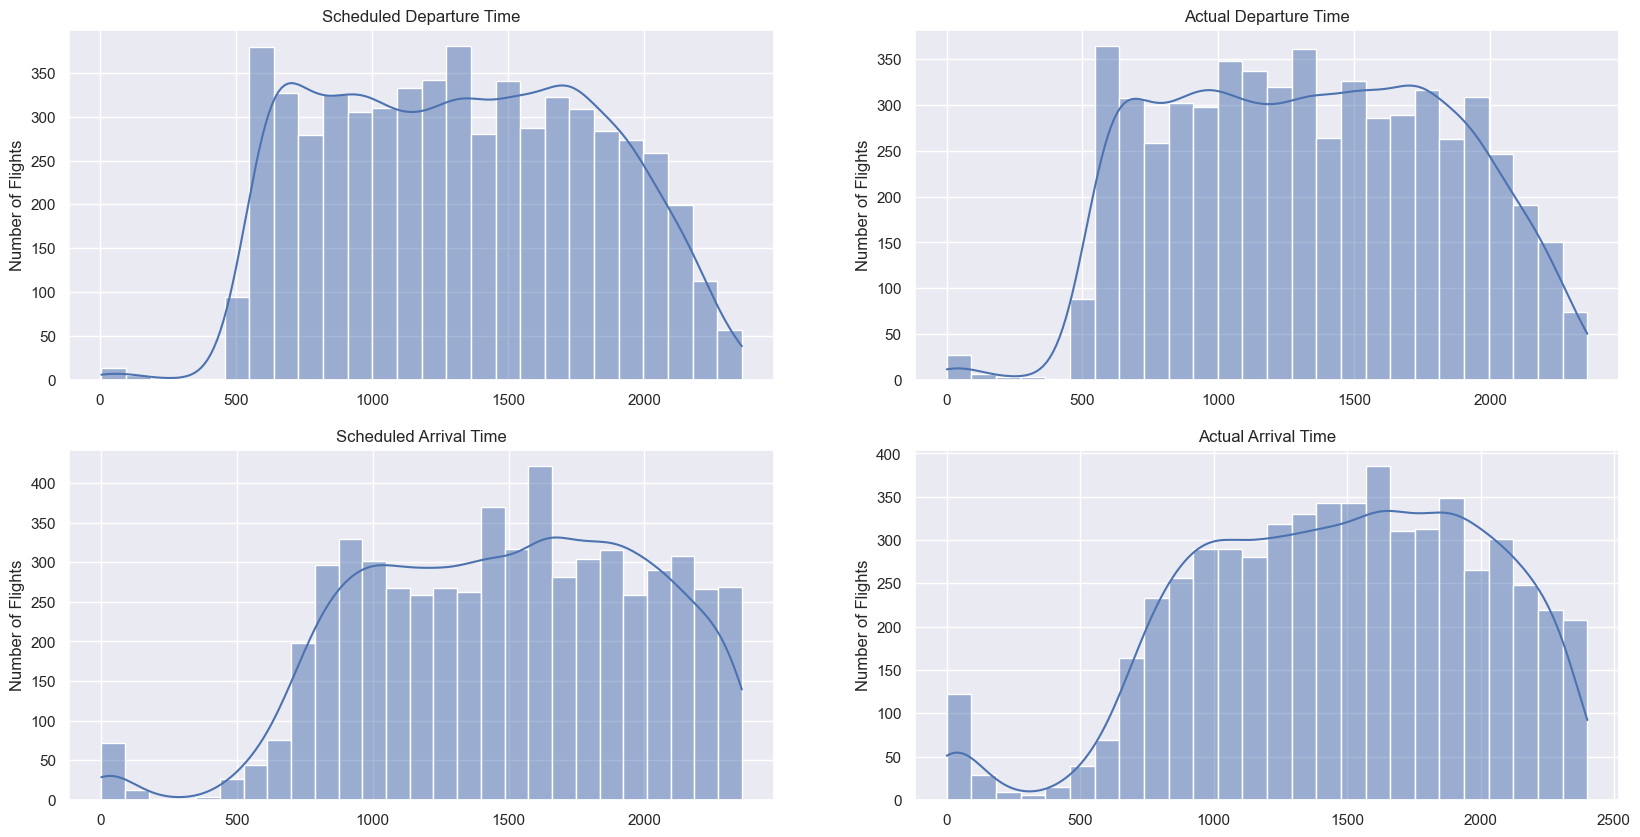

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_style('dark')
sns.histplot(data=num_df, x='SCHEDULED_DEPARTURE', kde=True, ax=ax[0, 0])
sns.histplot(data=num_df, x='DEPARTURE_TIME', kde=True, ax=ax[0, 1])
sns.histplot(data=num_df, x='SCHEDULED_ARRIVAL', kde=True, ax=ax[1, 0])
sns.histplot(data=num_df, x='ARRIVAL_TIME', kde=True, ax=ax[1, 1])
ax[0, 0].set_title('Scheduled Departure Time')
ax[0, 1].set_title('Actual Departure Time')
ax[1, 0].set_title('Scheduled Arrival Time')
ax[1, 1].set_title('Actual Arrival Time')
for axes in ax.flat:
    axes.set_ylabel('Number of Flights')
    axes.set_xlabel('')
plt.show()

the earliest scheduled flight was 5 minutes after midnight and the latest flight was on 11:59 pm with most of the filghts departing around 13:30 pm, which isn't very different from the actual departure time .
the earliest arrival scheduled flight was 1 minute after mid night , and the latest was on midnight 00:00 , with most off the flights scheduled arriving around 15:00 pm , which isn't very different from the actual arrival time.

In [22]:
num_df['DEPARTURE_DELAY'].describe()

count    5740.000000
mean        9.505923
std        37.514894
min       -23.000000
25%        -5.000000
50%        -1.000000
75%         8.000000
max      1043.000000
Name: DEPARTURE_DELAY, dtype: float64

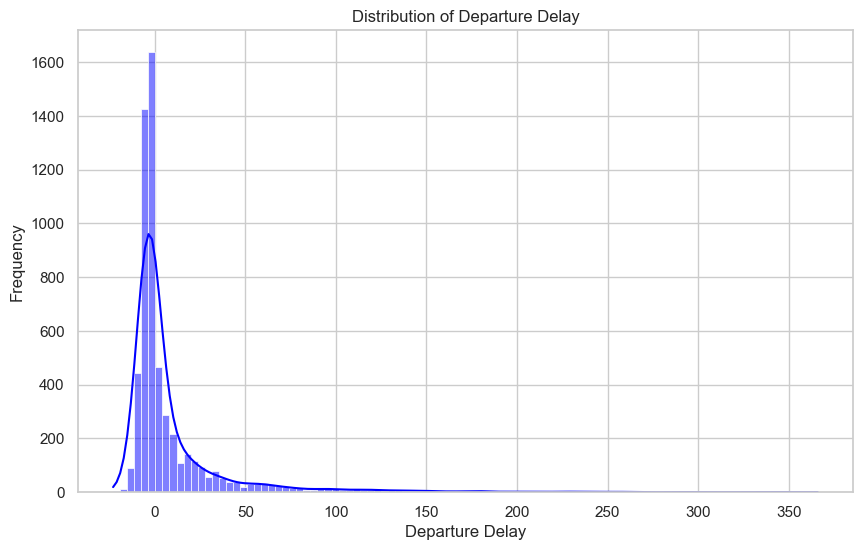

In [23]:
plt.figure(figsize=(10, 6)) 
sns.set_style('whitegrid')
sns.histplot(num_df[num_df['DEPARTURE_DELAY']<400]['DEPARTURE_DELAY'], bins=100, kde=True, color='blue')
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delay')
plt.show()


there is a mean of around 0 minutes of delay on each flight , with some flight departing early (-23 mins) and the max delay was 1h .

In [24]:
num_df['ARRIVAL_DELAY'].describe()  

count    5719.000000
mean        4.439762
std        39.724046
min       -60.000000
25%       -13.000000
50%        -5.000000
75%         8.000000
max      1054.000000
Name: ARRIVAL_DELAY, dtype: float64

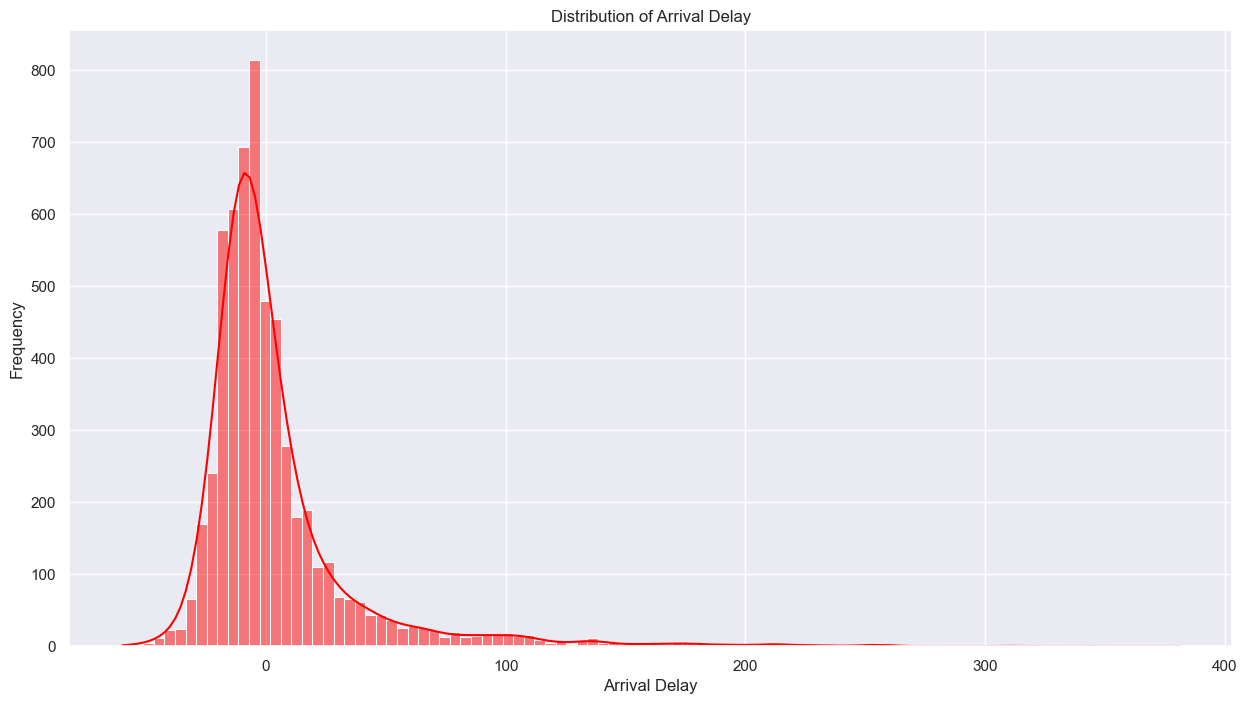

In [25]:
sns.set(rc={'figure.figsize':(15,8)})
sns.histplot(num_df[num_df['ARRIVAL_DELAY']<400]['ARRIVAL_DELAY'], bins=100, kde=True, color='red')
plt.xlabel('Arrival Delay') 
plt.ylabel('Frequency')
plt.title('Distribution of Arrival Delay')
plt.show()

ther's a mean of 4 minutes of arrival delay , with some flights arriving early with 6 min ,and some making 1 h delay which is logical since the departure delay was 1h also .


In [26]:
num_df[['AIR_TIME','SCHEDULED_TIME','DISTANCE']].describe()

,AIR_TIME,SCHEDULED_TIME,DISTANCE
count,5719.000000,5819.000000,5819.000000
mean,112.584193,140.725039,815.192129
std,71.759739,74.926262,605.570100
min,9.000000,23.000000,31.000000
25%,59.000000,85.000000,368.000000
50%,94.000000,121.000000,643.000000
75%,143.000000,173.000000,1061.000000
max,559.000000,604.000000,4962.000000


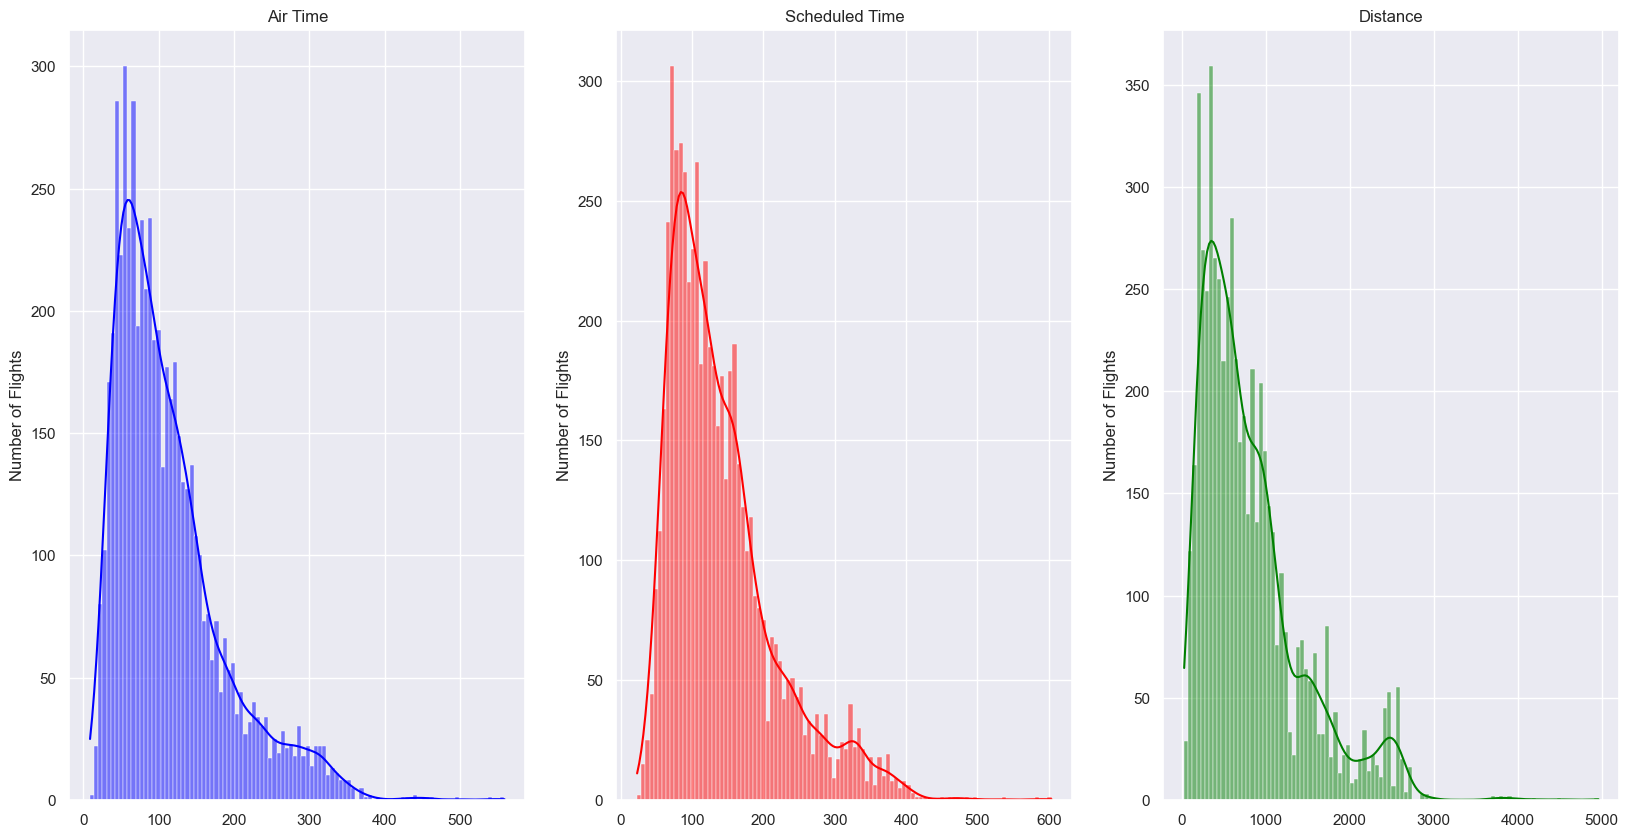

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
num_df[['AIR_TIME','SCHEDULED_TIME','DISTANCE']]
sns.histplot(num_df['AIR_TIME'], bins=100, kde=True, color='blue', ax=ax[0])
sns.histplot(num_df['SCHEDULED_TIME'], bins=100, kde=True, color='red', ax=ax[1])
sns.histplot(num_df['DISTANCE'], bins=100, kde=True, color='green', ax=ax[2])
ax[0].set_title('Air Time')
ax[1].set_title('Scheduled Time')
ax[2].set_title('Distance')
for axes in ax.flat:
    axes.set_ylabel('Number of Flights')
    axes.set_xlabel('')
plt.show()

 The distributions indicate that most flights had similar air times and scheduled times, with a few outliers.
The distance distribution shows that most flights covered a moderate distance, with a few long-haul flights.

In [28]:
num_df[['TAXI_IN', 'TAXI_OUT', 'WHEELS_ON', 'WHEELS_OFF']].describe()

,TAXI_IN,TAXI_OUT,WHEELS_ON,WHEELS_OFF
count,5735.000000,5739.000000,5735.000000,5739.000000
mean,7.345248,16.032758,1461.814124,1360.225301
std,5.527280,8.971177,528.917828,501.914943
min,1.000000,3.000000,1.000000,1.000000
25%,4.000000,11.000000,1048.500000,937.000000
50%,6.000000,14.000000,1506.000000,1351.000000
75%,9.000000,19.000000,1905.000000,1754.000000
max,99.000000,134.000000,2400.000000,2400.000000


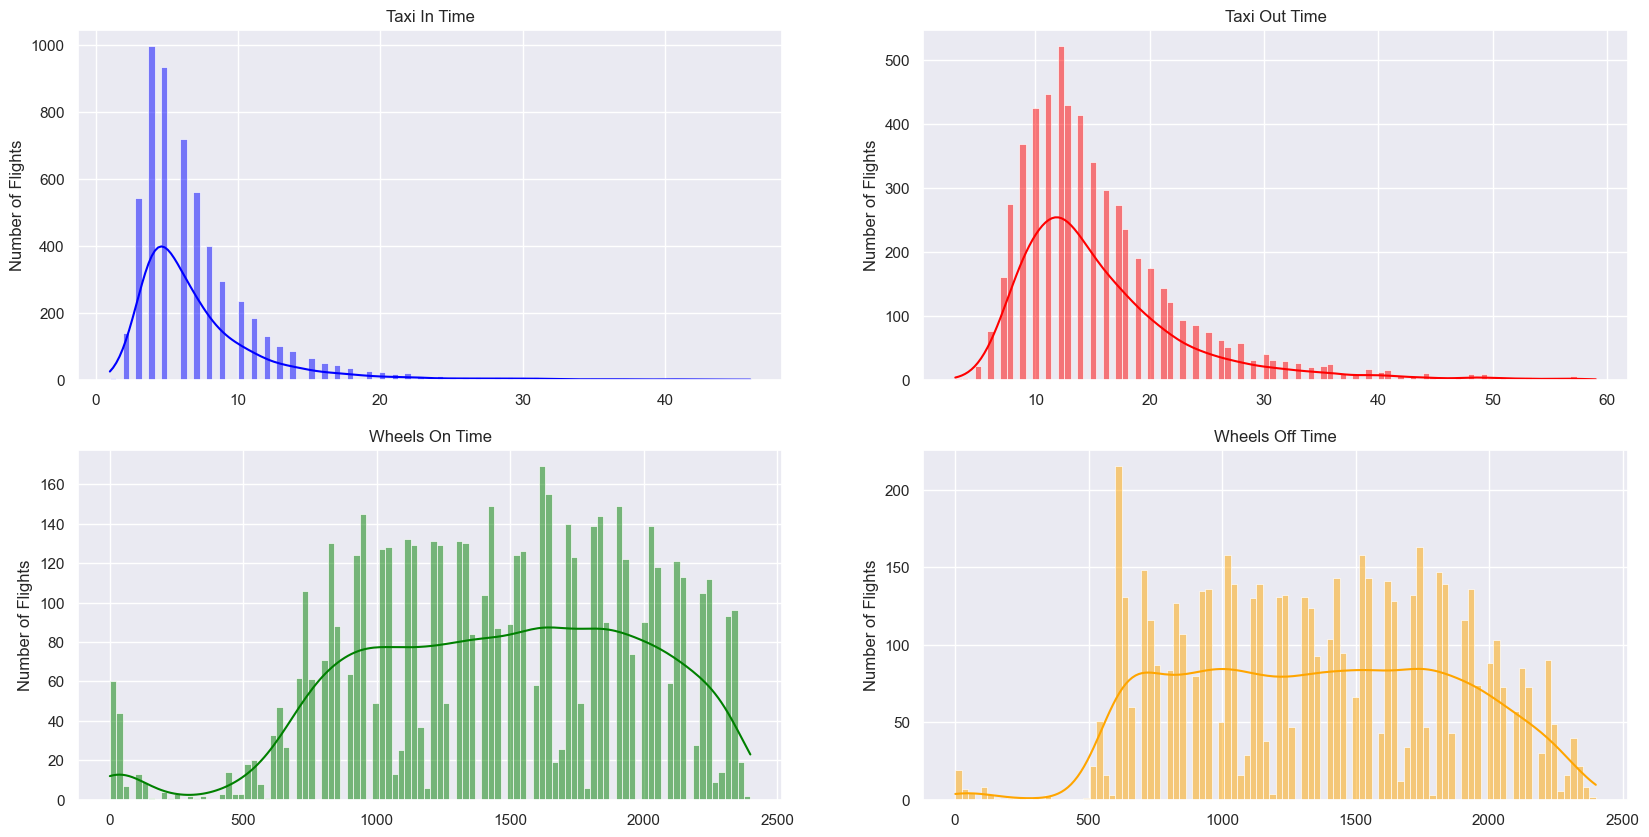

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))  
sns.histplot(num_df[num_df['TAXI_IN']<50]['TAXI_IN'], bins=100, kde=True, color='blue', ax=ax[0, 0])
sns.histplot(num_df[num_df['TAXI_OUT']<60]['TAXI_OUT'], bins=100, kde=True, color='red', ax=ax[0, 1])
sns.histplot(num_df['WHEELS_ON'], bins=100, kde=True, color='green', ax=ax[1, 0])
sns.histplot(num_df['WHEELS_OFF'], bins=100, kde=True, color='orange', ax=ax[1, 1])
ax[0, 0].set_title('Taxi In Time')
ax[0, 1].set_title('Taxi Out Time')
ax[1, 0].set_title('Wheels On Time')
ax[1, 1].set_title('Wheels Off Time')
for axes in ax.flat:
    axes.set_ylabel('Number of Flights')
    axes.set_xlabel('')
plt.show()


In [30]:
df['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
B    39
A    28
C    14
Name: count, dtype: int64

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\1860097825.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CANCELLATION_REASON'].replace({'A': 'Airline/Carrier', 'B': 'Weather', 'C': 'National Air System', 'D': 'Security'}, inplace=True)
C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\1860097825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(da

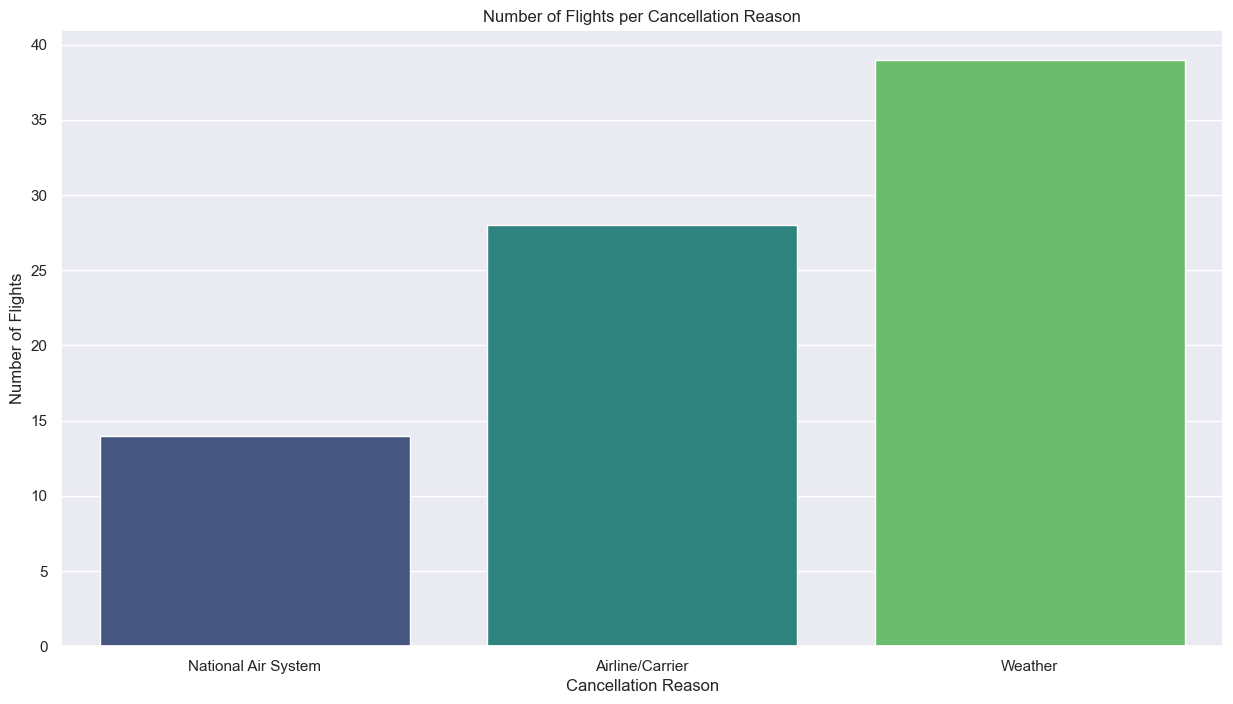

In [31]:
df['CANCELLATION_REASON'].replace({'A': 'Airline/Carrier', 'B': 'Weather', 'C': 'National Air System', 'D': 'Security'}, inplace=True)
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data=df, x='CANCELLATION_REASON', palette='viridis')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Cancellation Reason')
plt.show()

the main reason for flight cancellation is due to weather the airline itself , then the airline system ,and there'sno delay because of security problems

In [32]:
df[['AIR_SYSTEM_DELAY','WEATHER_DELAY','LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','SECURITY_DELAY']].describe()  

,AIR_SYSTEM_DELAY,WEATHER_DELAY,LATE_AIRCRAFT_DELAY,AIRLINE_DELAY,SECURITY_DELAY
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,12.453297,2.818681,23.408425,18.836996,0.178571
std,25.294319,15.600304,47.692952,48.821801,3.634061
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,2.000000,0.000000
75%,17.000000,0.000000,32.000000,19.000000,0.000000
max,381.000000,247.000000,1033.000000,801.000000,88.000000


In [33]:
df.select_dtypes(include='object')

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
0,UA,N18220,PHX,ORD,NaN
1,AA,N3ALAA,LGA,ORD,NaN
2,OO,N988CA,ORD,ICT,NaN
3,OO,N971SW,SBN,ORD,NaN
4,DL,N3736C,PHX,DTW,NaN
...,...,...,...,...,...
5814,EV,N25134,IAH,HOB,NaN
5815,EV,N856AS,ATL,LFT,NaN
5816,DL,N956DL,ATL,MEM,NaN
5817,MQ,N505MQ,ATL,LGA,NaN


In [34]:
df['AIRLINE'].value_counts()

AIRLINE
WN    1286
DL     893
AA     724
OO     591
EV     568
UA     518
MQ     293
B6     269
US     197
AS     162
NK     104
F9      85
HA      69
VX      60
Name: count, dtype: int64

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\4059797400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AIRLINE', palette='viridis')


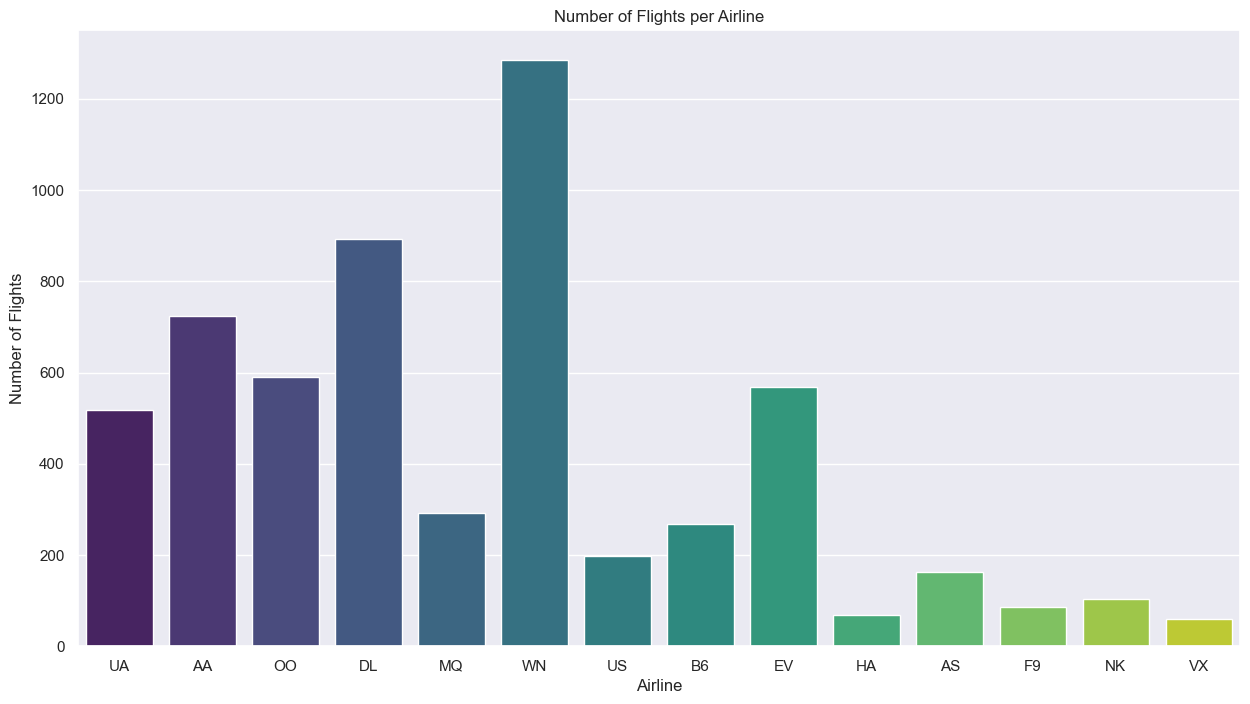

In [44]:
sns.set_theme('paper')
sns.set_style('dark')
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(data=df, x='AIRLINE', palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Airline')
plt.show()


the WN airline has the most flights of that year of 2015 ,and VX has the least flights of that year , with some airlines avreging a number of flights between 500 to 900 , and other airlines avreging between 50 to 350.

In [36]:
df['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT
ATL      356
ORD      291
DFW      224
LAX      216
DEN      177
        ... 
14689      1
12003      1
11612      1
SBP        1
10154      1
Name: count, Length: 361, dtype: int64

In [37]:
df['DESTINATION_AIRPORT'].value_counts()

DESTINATION_AIRPORT
ATL      357
ORD      266
DFW      243
DEN      190
LAX      182
        ... 
13029      1
COD        1
APN        1
13830      1
HOB        1
Name: count, Length: 371, dtype: int64

C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\470052005.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\Hachem Brahimi\AppData\Local\Temp\ipykernel_2384\470052005.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


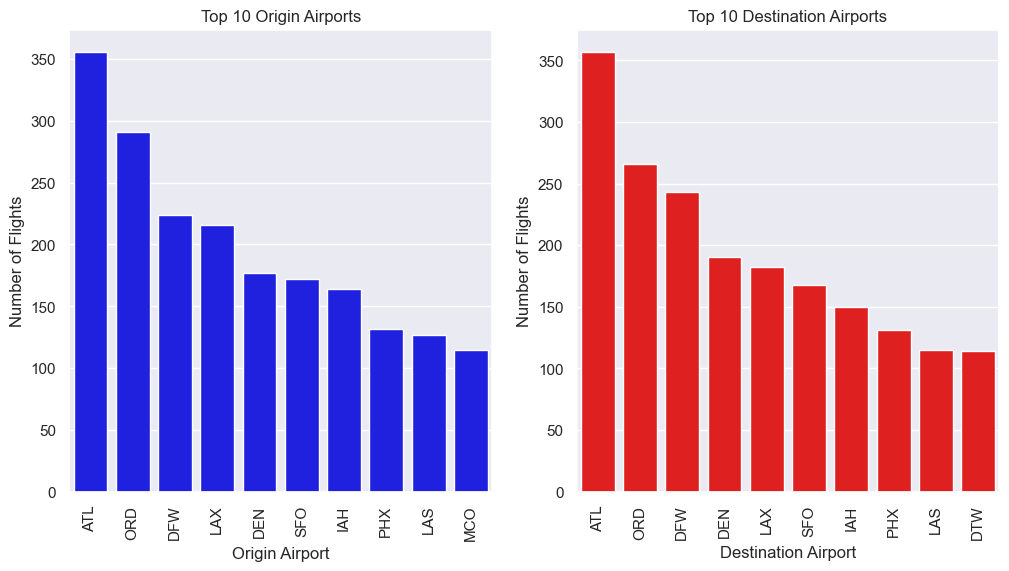

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='ORIGIN_AIRPORT', order=df['ORIGIN_AIRPORT'].value_counts().index[:10], ax=ax[0],color='blue')
sns.countplot(data=df, x='DESTINATION_AIRPORT', order=df['DESTINATION_AIRPORT'].value_counts().index[:10], ax=ax[1],color='red')    
ax[0].set_title('Top 10 Origin Airports')
ax[1].set_title('Top 10 Destination Airports')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[0].set_ylabel('Number of Flights')
ax[0].set_xlabel('Origin Airport')
ax[1].set_ylabel('Number of Flights')
ax[1].set_xlabel('Destination Airport')
plt.show()


ATL airport was the busiest airport that year with 350 flights leaving and 350 arriving , next is ORD & DFW ,  then LAX & DEN

# Multivariate Analysis: